#   Holiday Package Prediction

##Abbreviations:

CustomerID: Unique customer ID ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes) Age: Age of customer TypeofContact: How customer was contacted (Company Invited or Self Inquiry) CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3 Occupation: Occupation of customer Gender: Gender of customer NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer PreferredPropertyStar: Preferred hotel property rating by customer MaritalStatus: Marital status of customer NumberOfTrips: Average number of trips in a year by customer Passport: The customer has a passport or not (0: No, 1: Yes) OwnCar: Whether the customers own a car or not (0: No, 1: Yes) NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer Designation: Designation of the customer in the current organization MonthlyIncome: Gross monthly income of the customer PitchSatisfactionScore: Sales pitch satisfaction score ProductPitched: Product pitched by the salesperson NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [3]:
# Importing necessary Libraries

In [4]:
#To install xgboost library use - 
!pip install xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To filter/truncate warnings

import warnings
warnings.filterwarnings('ignore')

#To see maximum no of columns
pd.pandas.set_option('display.max_columns',None)

# Read the dataset to the python environment

In [5]:
df = pd.read_csv('Travel.csv')

#Display first 5 rows

df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Check the basic details of the dataset


In [6]:
df.shape

(4888, 20)

In [7]:
# There are 4888 rows and 20 columns

In [8]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [9]:
#Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [10]:
#Designation,Maritalstatus,ProductPitched,Gender,Occupation,Type of Contact are categorical variables while others are numerical value.
#ProdTaken is the Target Variable

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [12]:
#Minimum age of customer is 18 and Maximum age is 61 with mean of 37.
#Mean Duration of pitch is 15 mins to max of 127 mins.
#Mean Number of trips is 3 with maximum of 22.
#Average monthly income of customer is 23619 with maximum of 98678.

In [13]:
# Checking for null values 

df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [14]:
#finding percentage of null values
((df.isnull().sum()/len(df)*100).sort_values(ascending=False))

DurationOfPitch             5.135025
MonthlyIncome               4.766776
Age                         4.623568
NumberOfTrips               2.864157
NumberOfChildrenVisiting    1.350245
NumberOfFollowups           0.920622
PreferredPropertyStar       0.531915
TypeofContact               0.511457
Designation                 0.000000
OwnCar                      0.000000
PitchSatisfactionScore      0.000000
Passport                    0.000000
CustomerID                  0.000000
MaritalStatus               0.000000
ProdTaken                   0.000000
NumberOfPersonVisiting      0.000000
Gender                      0.000000
Occupation                  0.000000
CityTier                    0.000000
ProductPitched              0.000000
dtype: float64

In [15]:
#There are missing values in this dataset.
#251 (5.14%) values are missing in DurationOfPitch.
#233 (4.77%) values are missig from MonthlyIncome.
#Age has 226 (4.62%) missing values.
#NumberOfTrips has 140 (2.86%) missing values.
#NumberOfChildrenVisiting,NumberOfFollowups,PreferredPropertyStar,TypeofContact has missing values as 66 (1.35%),45(0.92%),26,25 respectively


In [16]:
#Number of unique values
df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [17]:
#Unique values inside each columns
for col in df:
    print(col,':',df[col].unique(),'\n\n')

CustomerID : [200000 200001 200002 ... 204885 204886 204887] 


ProdTaken : [1 0] 


Age : [41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.] 


TypeofContact : ['Self Enquiry' 'Company Invited' nan] 


CityTier : [3 1 2] 


DurationOfPitch : [  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  nan  24.  35.  28.  20.  26.  34.
  23.   5.  19. 126.   7.  36. 127.] 


Occupation : ['Salaried' 'Free Lancer' 'Small Business' 'Large Business'] 


Gender : ['Female' 'Male' 'Fe Male'] 


NumberOfPersonVisiting : [3 2 1 4 5] 


NumberOfFollowups : [ 3.  4.  2.  5. nan  1.  6.] 


ProductPitched : ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King'] 


PreferredPropertyStar : [ 3.  4.  5. nan] 


MaritalStatus : ['Single' 'Divorced' 'Married' 'Unmarried'] 


NumberOfTrips : [ 1.  2.  7.  5.  6.  3.  4. 19. 21.

In [18]:
df.select_dtypes(include='number').nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
CityTier                       3
DurationOfPitch               34
NumberOfPersonVisiting         5
NumberOfFollowups              6
PreferredPropertyStar          3
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
MonthlyIncome               2475
dtype: int64

In [19]:
#Here, we can see that there are four features that have an abnormally low number of unique values. That is indicative that those numerical values actually stand for categorical values.

In [20]:
#Columns which can be considered as categorical
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport','CityTier','MaritalStatus','ProductPitched','Gender','Occupation','TypeofContact']

In [21]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts())
    print('-'*50)

Unique values in Designation are :
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
--------------------------------------------------
Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------
Unique values in OwnCar are :
1    3032
0    1856
Name: OwnCar, dtype: int64
--------------------------------------------------
Unique values in Passport are :
0    3466
1    1422
Name: Passport, dtype: int64
--------------------------------------------------
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Unique values in ProductPitched are :

In [22]:
#920 customer had taken package last time.
#Single and unmarried status are not same category . Here unmarried means customers having partners.
#Female and Fe male are same category.
#3 star property is prefered by customers
#Most of the customers are from Tier1 cities

In [23]:
#Fixing Female and Fe male category in dataset to Female
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

# Exploratory Data Analysis

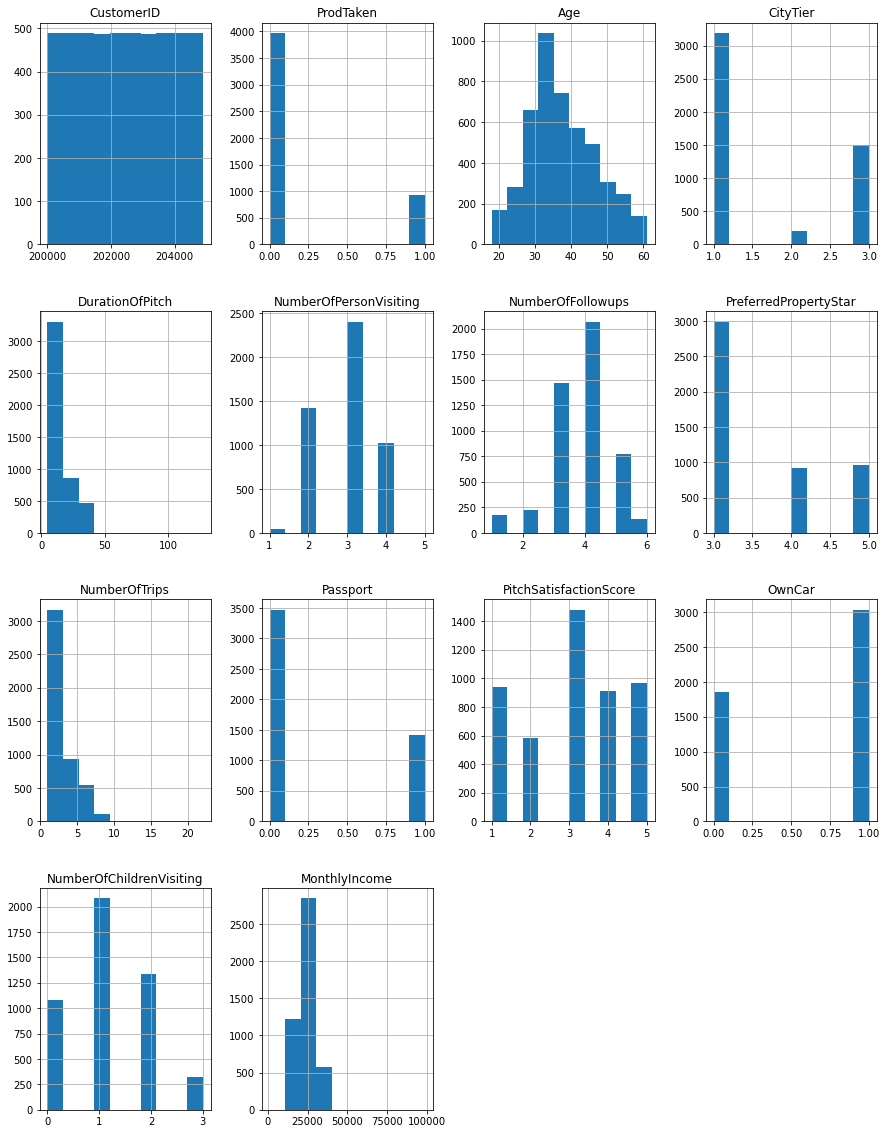

In [24]:
# Univariate analysis of Numerical features
# Histogram to check the distribution of all the numerical columns
df.select_dtypes(include=['int64','float64']).hist(figsize = (15,20))
plt.show()

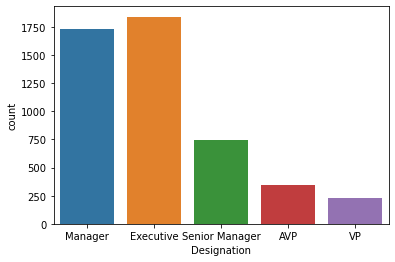

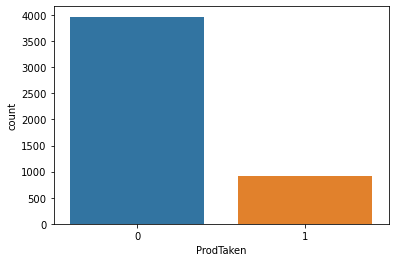

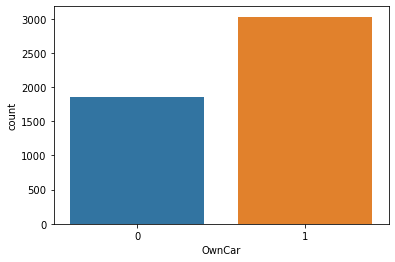

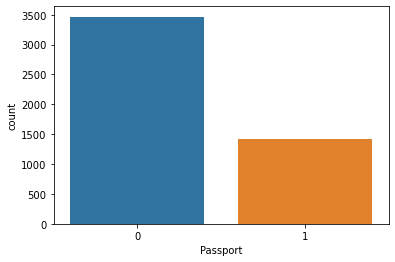

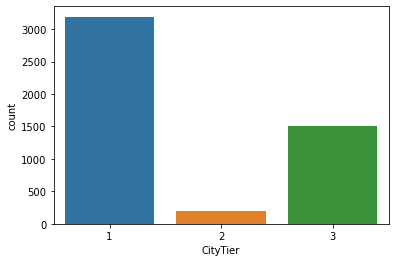

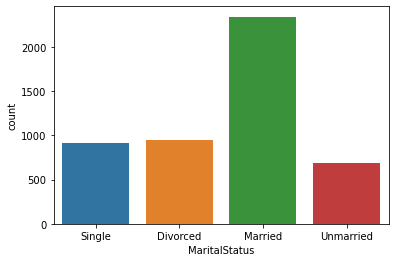

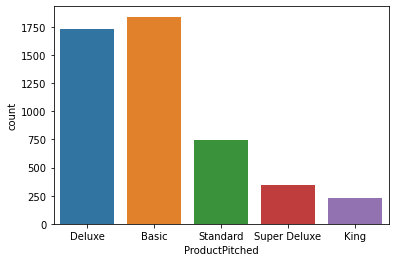

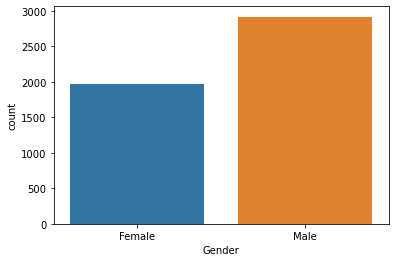

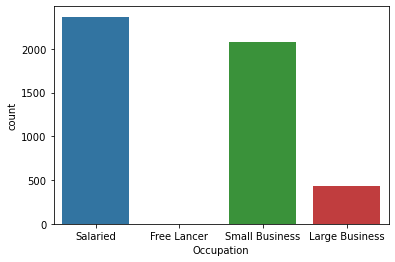

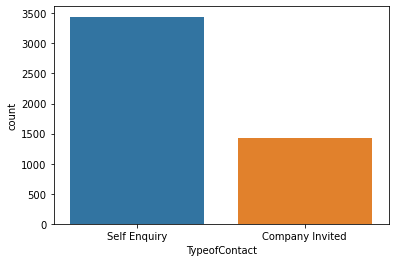

In [25]:
#Univariate analysis of categorical features
for x in cat_cols:
    sns.countplot(df[x])
    plt.show()

In [26]:
#Most of the customers are Executive, followed by managers.
#920 customers accepted product offered last time.
#3032 customers own car.
#Less number of customers has passport.
#3 star property is prefered by customers
#Most of the customers are from Tier1 cities
#Most of the customers are married
#Basic package was pitched to 1842 customers and 1732 were pitched Deluxe package.
#Most of the customers are male.
#Occupation of nearly half of the customers is salaried.
#Most of the customers self enquired  for the packages.

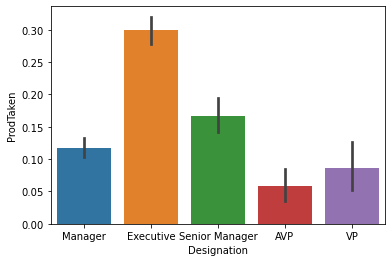

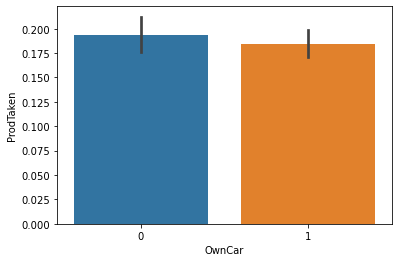

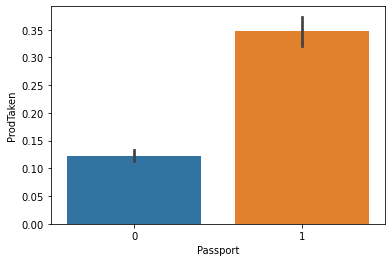

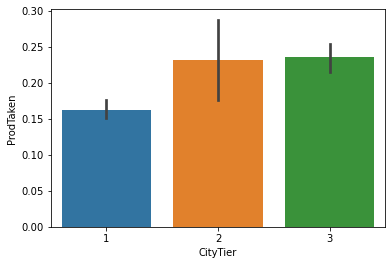

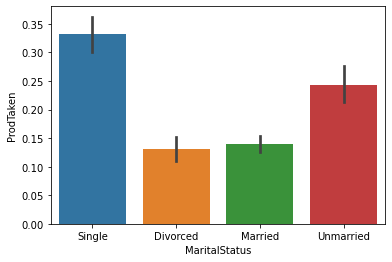

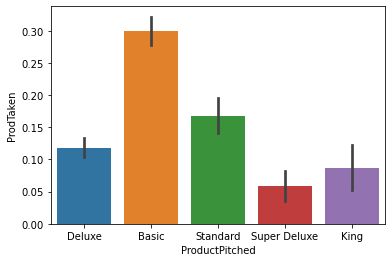

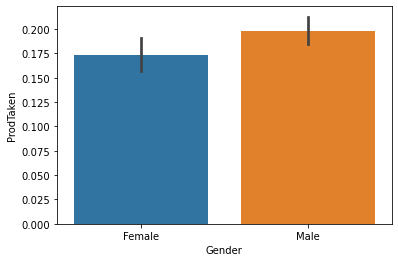

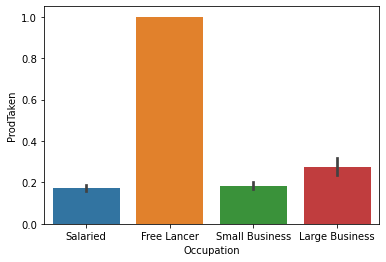

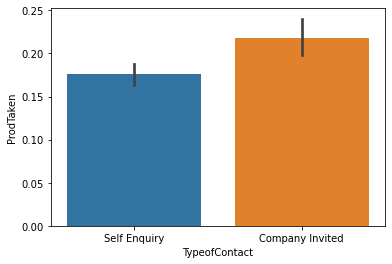

In [27]:
# Bivariate Analysis on categorical columns
cat_cols = ['Designation', 'OwnCar', 'Passport','CityTier','MaritalStatus','ProductPitched','Gender','Occupation','TypeofContact']
for i in cat_cols:
    sns.barplot(x=df[i],y='ProdTaken',data=df) 
    plt.show()

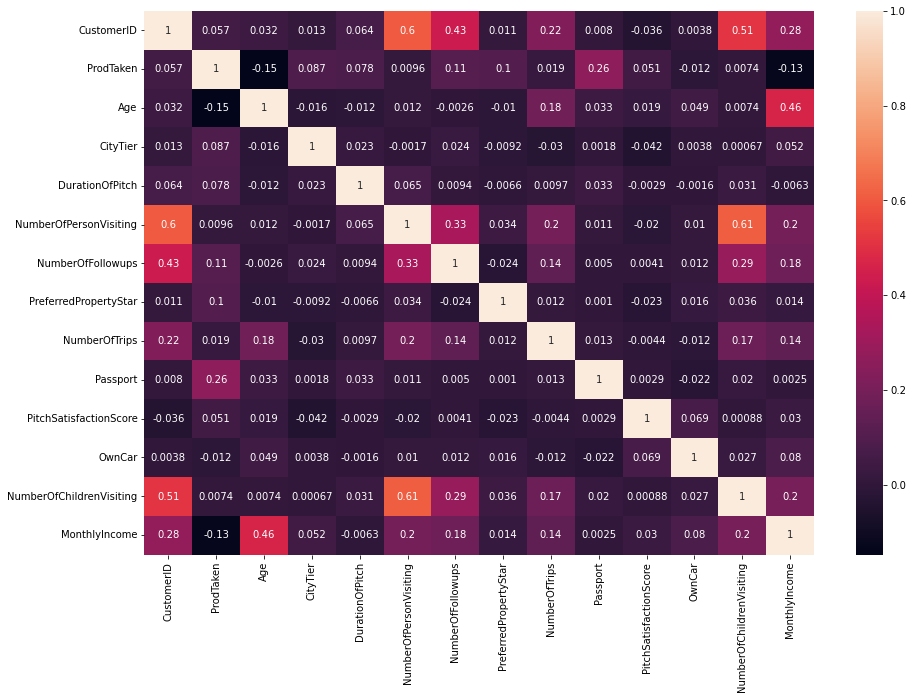

In [28]:
#Analysis on numerical data
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [29]:
#Observation:

#Number of Persons Visting as expected has good positive correlation with Number of Children Visting
#Monthly Income shows moderate positive correlation with Age

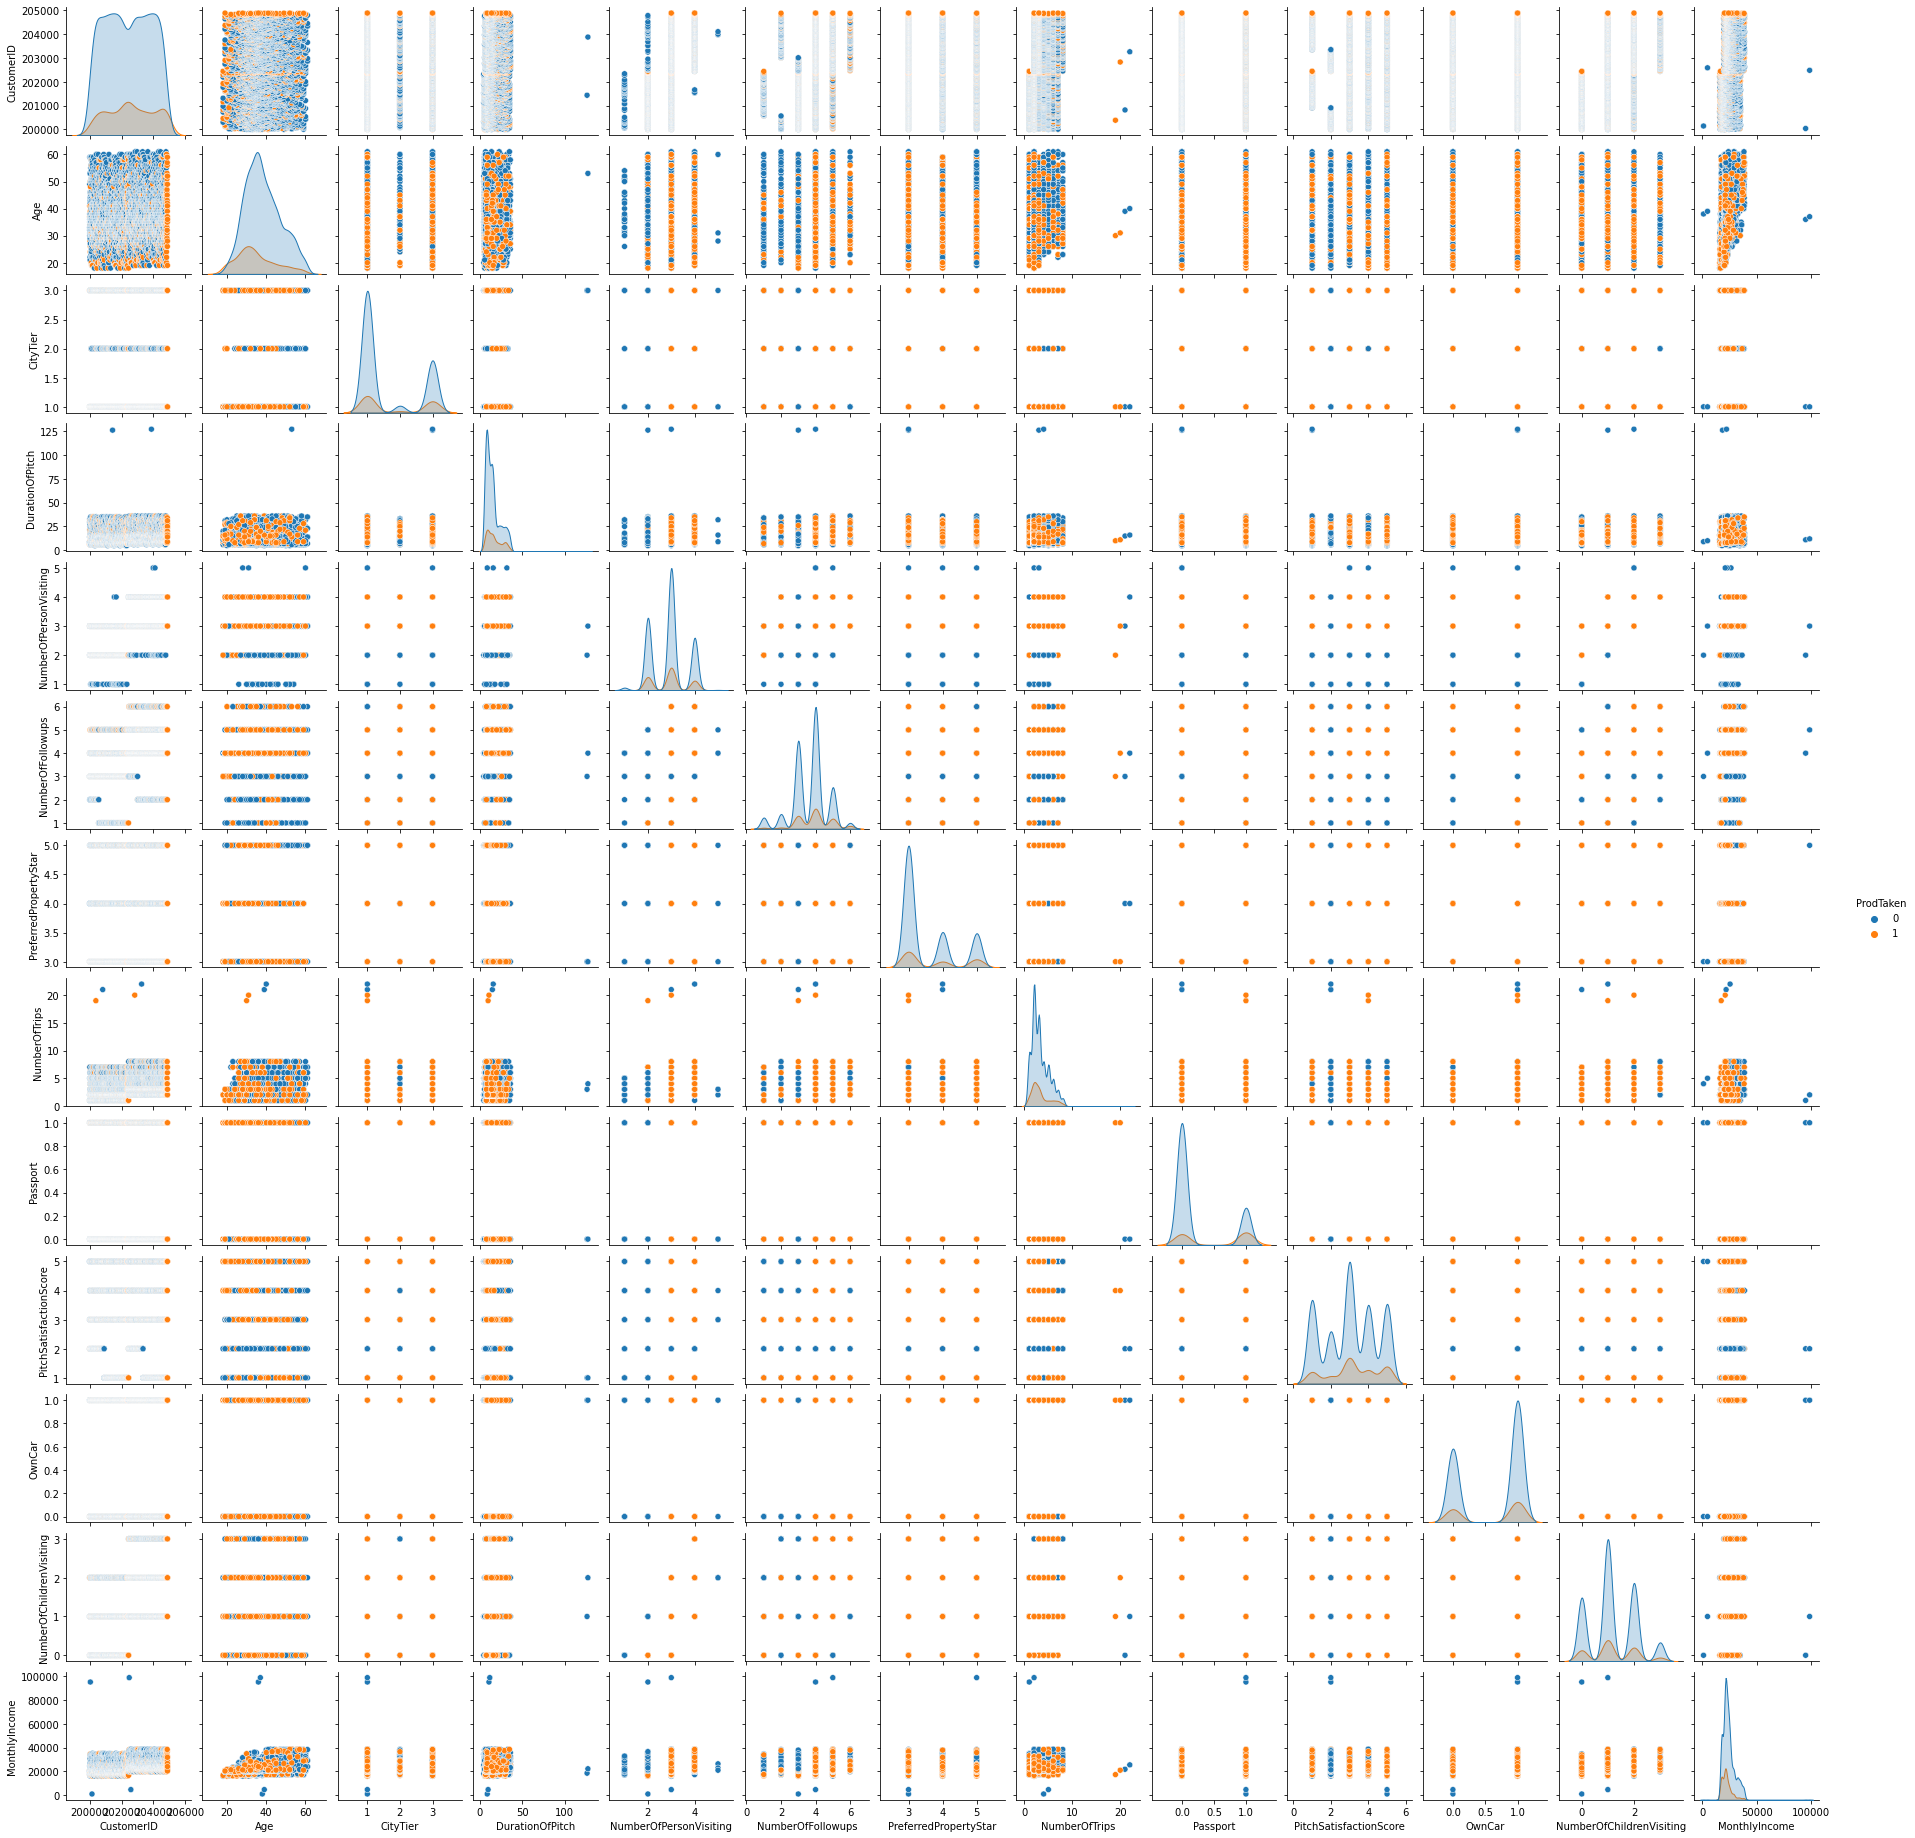

In [30]:
# Multivariate analysis
sns.pairplot(df,hue='ProdTaken',size=2)

# Data Pre-processing

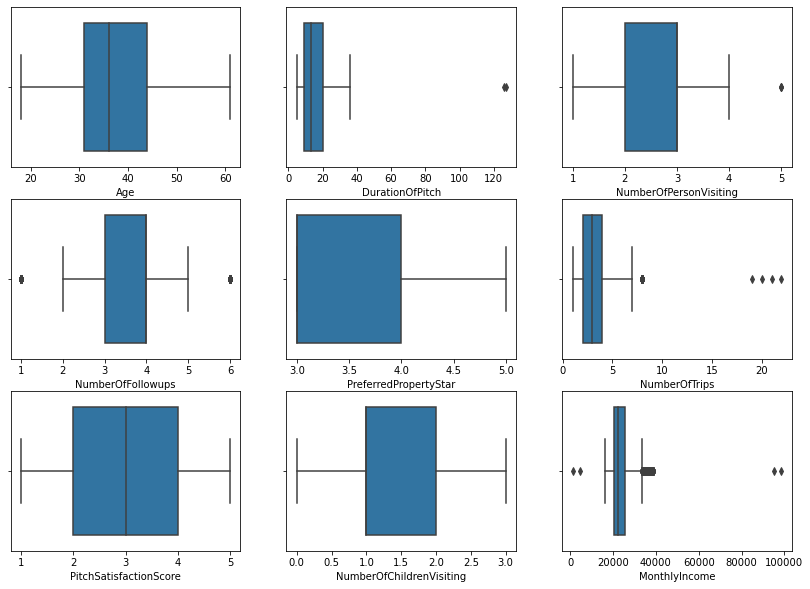

In [31]:
# Outlier detection
fig,axes = plt.subplots(3,3,figsize = (14,10))
sns.boxplot(data = df, x= 'Age',ax=axes[0,0])
sns.boxplot(data = df, x= 'DurationOfPitch',ax=axes[0,1])
sns.boxplot(data = df, x='NumberOfPersonVisiting',ax=axes[0,2])
sns.boxplot(data = df, x= 'NumberOfFollowups',ax=axes[1,0])
sns.boxplot(data = df, x= 'PreferredPropertyStar',ax=axes[1,1])
sns.boxplot(data = df, x='NumberOfTrips',ax=axes[1,2])
sns.boxplot(data = df, x='PitchSatisfactionScore',ax=axes[2,0])
sns.boxplot(data = df, x='NumberOfChildrenVisiting',ax=axes[2,1])
sns.boxplot(data = df, x='MonthlyIncome',ax=axes[2,2])
plt.show()

In [32]:
#Age is normally distrubted and doesn't have any outliers
#Duration of pitch is Right skewed with some outliers greater than 120 .
#Number of visitors is usually 3 with a outlier of 5.
#Average number of folows up are 4 with extreme of 6
#Number of trips is right skewed with some outliers where trips are greater than 17.
#Monthly income is Right skewed and has some outlier.

In [33]:
# Handling Missing Values

In [34]:
# Checking for null values 

df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [35]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

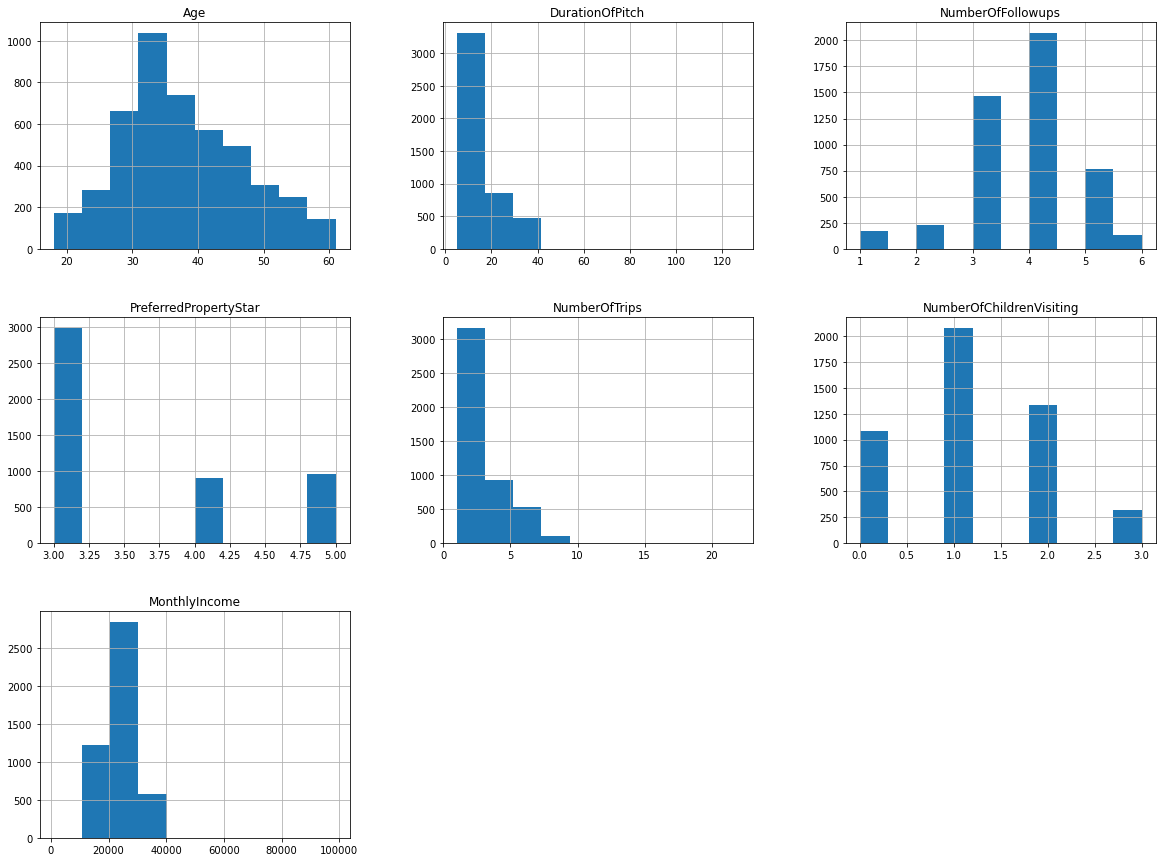

In [36]:
freqgraph = df.select_dtypes(include=['float'])     
freqgraph.hist(figsize=(20,15))
plt.show()

In [37]:
#Filling missing values

for i in ['Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']:
    df[i]=df[i].fillna(df[i].median())

In [38]:
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)

In [39]:
# Checking null values again

df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [40]:
# All missing values are filled

In [41]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

# Encoding

In [42]:
en_cols = ['Designation','MaritalStatus','ProductPitched','Gender','Occupation','TypeofContact']

In [43]:
# Delete customer id
df.drop(['CustomerID'],axis=1,inplace=True)

In [44]:
#Encoding
#Designation - Ordinal-labelencoding
#MaritalStatus-Nominal-onehotencoding
#ProductPitched-Ordinal-labelencoding
#Gender -Nominal-onehotencoding
#Occupation--Nominal-onehotencoding
#TypeofContact -Nominal-onehotencoding

In [45]:
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()

l=['Designation','ProductPitched']
for i in np.arange(len(l)):
    df[l[i]] = label_en.fit_transform(df[l[i]])

In [46]:
df.head(3)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,1,3.0,Single,1.0,1,2,1,0.0,2,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,1,4.0,Divorced,2.0,0,3,1,2.0,2,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,0,3.0,Single,7.0,1,3,0,0.0,1,17090.0


In [47]:
#Onehot Encoding 
df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)
df.head(2)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,0,3,3.0,1,3.0,Single,1.0,1,2,1,0.0,2,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,1,3,4.0,1,4.0,Divorced,2.0,0,3,1,2.0,2,20130.0


In [48]:
df_maritalstatus=pd.get_dummies(df['MaritalStatus'],drop_first=1)
df_maritalstatus.head(2)

,Married,Single,Unmarried
0,0,1,0
1,0,0,0


In [49]:
df=pd.concat([df,df_maritalstatus],axis=1)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Married,Single,Unmarried
0,1,41.0,Self Enquiry,3,6.0,Salaried,0,3,3.0,1,3.0,Single,1.0,1,2,1,0.0,2,20993.0,0,1,0
1,0,49.0,Company Invited,1,14.0,Salaried,1,3,4.0,1,4.0,Divorced,2.0,0,3,1,2.0,2,20130.0,0,0,0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,1,3,4.0,0,3.0,Single,7.0,1,3,0,0.0,1,17090.0,0,1,0
3,0,33.0,Company Invited,1,9.0,Salaried,0,2,3.0,0,3.0,Divorced,2.0,1,5,1,1.0,1,17909.0,0,0,0
4,0,36.0,Self Enquiry,1,8.0,Small Business,1,2,3.0,0,4.0,Divorced,1.0,0,5,1,0.0,1,18468.0,0,0,0


In [50]:
df.drop(['MaritalStatus'],axis=1,inplace=True)

In [51]:
df['TypeofContact']=pd.get_dummies(df['TypeofContact'],drop_first=1)
df.head(2)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Married,Single,Unmarried
0,1,41.0,1,3,6.0,Salaried,0,3,3.0,1,3.0,1.0,1,2,1,0.0,2,20993.0,0,1,0
1,0,49.0,0,1,14.0,Salaried,1,3,4.0,1,4.0,2.0,0,3,1,2.0,2,20130.0,0,0,0


In [52]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Married,Single,Unmarried
0,1,41.0,1,3,6.0,Salaried,0,3,3.0,1,3.0,1.0,1,2,1,0.0,2,20993.0,0,1,0
1,0,49.0,0,1,14.0,Salaried,1,3,4.0,1,4.0,2.0,0,3,1,2.0,2,20130.0,0,0,0
2,1,37.0,1,1,8.0,Free Lancer,1,3,4.0,0,3.0,7.0,1,3,0,0.0,1,17090.0,0,1,0
3,0,33.0,0,1,9.0,Salaried,0,2,3.0,0,3.0,2.0,1,5,1,1.0,1,17909.0,0,0,0
4,0,36.0,1,1,8.0,Small Business,1,2,3.0,0,4.0,1.0,0,5,1,0.0,1,18468.0,0,0,0


In [53]:
df_Occupation=pd.get_dummies(df['Occupation'],drop_first=1)
df_Occupation.head(2)

,Large Business,Salaried,Small Business
0,0,1,0
1,0,1,0


In [54]:
df=pd.concat([df,df_Occupation],axis=1)
df.head(2)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Married,Single,Unmarried,Large Business,Salaried,Small Business
0,1,41.0,1,3,6.0,Salaried,0,3,3.0,1,3.0,1.0,1,2,1,0.0,2,20993.0,0,1,0,0,1,0
1,0,49.0,0,1,14.0,Salaried,1,3,4.0,1,4.0,2.0,0,3,1,2.0,2,20130.0,0,0,0,0,1,0


In [55]:
df.drop(['Occupation'],axis=1,inplace=True)

In [56]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Married,Single,Unmarried,Large Business,Salaried,Small Business
0,1,41.0,1,3,6.0,0,3,3.0,1,3.0,1.0,1,2,1,0.0,2,20993.0,0,1,0,0,1,0
1,0,49.0,0,1,14.0,1,3,4.0,1,4.0,2.0,0,3,1,2.0,2,20130.0,0,0,0,0,1,0
2,1,37.0,1,1,8.0,1,3,4.0,0,3.0,7.0,1,3,0,0.0,1,17090.0,0,1,0,0,0,0
3,0,33.0,0,1,9.0,0,2,3.0,0,3.0,2.0,1,5,1,1.0,1,17909.0,0,0,0,0,1,0
4,0,36.0,1,1,8.0,1,2,3.0,0,4.0,1.0,0,5,1,0.0,1,18468.0,0,0,0,0,0,1


In [57]:
df.shape

(4888, 23)

In [58]:
df.dtypes

ProdTaken                     int64
Age                         float64
TypeofContact                 uint8
CityTier                      int64
DurationOfPitch             float64
Gender                        uint8
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched                int32
PreferredPropertyStar       float64
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                   int32
MonthlyIncome               float64
Married                       uint8
Single                        uint8
Unmarried                     uint8
Large Business                uint8
Salaried                      uint8
Small Business                uint8
dtype: object

In [59]:
df['TypeofContact']=df['TypeofContact'].astype(int)
df['Gender']=df['Gender'].astype(int)
df['Married']=df['Married'].astype(int)
df['Single']=df['Single'].astype(int)
df['Unmarried']=df['Unmarried'].astype(int)
df['Large Business']=df['Large Business'].astype(int)
df['Salaried']=df['Salaried'].astype(int)
df['Small Business']=df['Small Business'].astype(int)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   int32  
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Gender                    4888 non-null   int32  
 6   NumberOfPersonVisiting    4888 non-null   int64  
 7   NumberOfFollowups         4888 non-null   float64
 8   ProductPitched            4888 non-null   int32  
 9   PreferredPropertyStar     4888 non-null   float64
 10  NumberOfTrips             4888 non-null   float64
 11  Passport                  4888 non-null   int64  
 12  PitchSatisfactionScore    4888 non-null   int64  
 13  OwnCar                    4888 non-null   int64  
 14  NumberOf

In [61]:
x=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']
print("Feature data dimension: ", x.shape) 

Feature data dimension:  (4888, 22)


In [62]:
# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 12 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 12 best features

             Features         Score
15      MonthlyIncome  91649.503852
10           Passport    235.825285
0                 Age    222.966448
7      ProductPitched    174.722713
3     DurationOfPitch    128.684162
17             Single    123.731512
16            Married     36.621230
14        Designation     24.756428
19     Large Business     22.137755
2            CityTier     18.721582
6   NumberOfFollowups     16.332394
18          Unmarried     13.593795


In [63]:
#Feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [64]:
print(model.feature_importances_)

[0.0879774  0.0362628  0.04278799 0.08566411 0.03932551 0.0326487
 0.05299935 0.05174417 0.05558616 0.06105631 0.08371911 0.06837062
 0.02812046 0.02844666 0.04629201 0.0654062  0.01743802 0.03199766
 0.0207873  0.01714564 0.02281445 0.02340936]


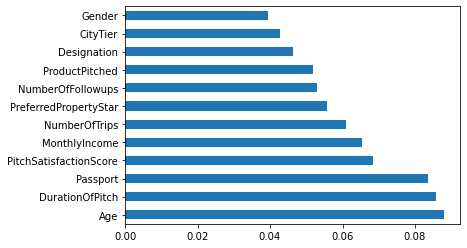

In [65]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(12).plot(kind='barh')
plt.show()

<AxesSubplot:>

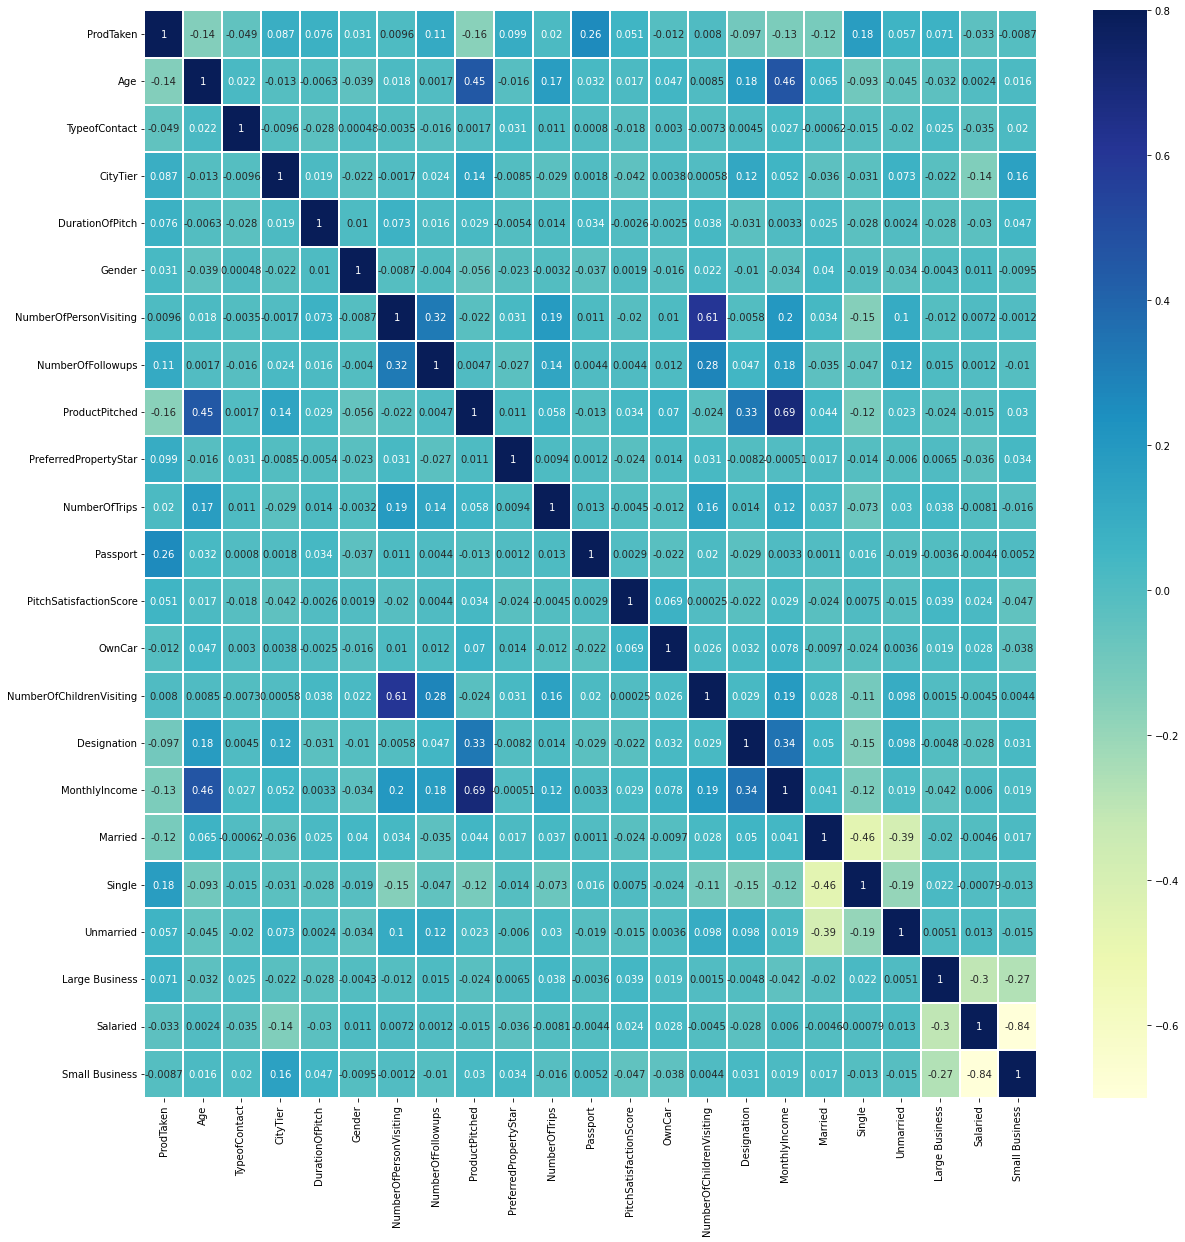

In [66]:
#Feature reduction
corrmatrix = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmatrix,vmin=-0.7,vmax=0.8,annot=True,linewidths = 0.2,cmap='YlGnBu')

In [67]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation', 'MonthlyIncome', 'Married', 'Single', 'Unmarried',
       'Large Business', 'Salaried', 'Small Business'],
      dtype='object')

# Feature Engineering

In [68]:
# Standard Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(x)
df_scaled=pd.DataFrame(df_scaled)
df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03,4.888000e+03
mean,-1.379432e-16,-4.674384e-17,-8.024132e-16,-8.715637e-17,-1.172912e-16,2.081555e-14,-3.473535e-16,2.039649e-17,2.485737e-16,-1.527533e-15,4.715268e-16,-1.591105e-16,1.661928e-16,4.329597e-16,-3.889415e-16,-3.161541e-16,-3.761993e-15,-6.281573e-16,3.438148e-15,-5.235401e-17,-9.471420e-17,-2.229531e-16
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-2.147139e+00,-1.563547e+00,-7.138709e-01,-1.246246e+00,-1.216019e+00,-2.628353e+00,-2.716103e+00,-9.279973e-01,-7.252218e-01,-1.223399e+00,-6.405242e-01,-1.521728e+00,-1.278132e+00,-1.390153e+00,-1.799465e+00,-4.291000e+00,-9.583148e-01,-4.802232e-01,-4.026777e-01,-3.121546e-01,-9.693722e-01,-8.621044e-01
25%,-7.191736e-01,-1.563547e+00,-7.138709e-01,-7.652061e-01,-1.216019e+00,-1.248694e+00,-7.124339e-01,-9.279973e-01,-7.252218e-01,-6.747273e-01,-6.405242e-01,-7.894768e-01,-1.278132e+00,-2.167689e-01,-7.587899e-01,-5.847421e-01,-9.583148e-01,-4.802232e-01,-4.026777e-01,-3.121546e-01,-9.693722e-01,-8.621044e-01
50%,-1.699563e-01,6.395714e-01,-7.138709e-01,-2.841660e-01,8.223557e-01,1.309661e-01,2.894007e-01,-1.440272e-01,-7.252218e-01,-1.260554e-01,-6.405242e-01,-5.722583e-02,7.823920e-01,-2.167689e-01,2.818849e-01,-2.305696e-01,-9.583148e-01,-4.802232e-01,-4.026777e-01,-3.121546e-01,-9.693722e-01,-8.621044e-01
75%,5.989480e-01,6.395714e-01,1.468369e+00,4.373942e-01,8.223557e-01,1.309661e-01,2.894007e-01,6.399428e-01,5.296044e-01,4.226166e-01,1.561221e+00,6.750251e-01,7.823920e-01,9.566156e-01,2.818849e-01,3.548517e-01,1.043498e+00,-4.802232e-01,-4.026777e-01,-3.121546e-01,1.031595e+00,1.159952e+00
max,2.576131e+00,6.395714e-01,1.468369e+00,1.342548e+01,8.223557e-01,2.890285e+00,2.293070e+00,2.207883e+00,1.784431e+00,1.029871e+01,1.561221e+00,1.407276e+00,7.823920e-01,2.130000e+00,2.363235e+00,1.428841e+01,1.043498e+00,2.082365e+00,2.483376e+00,3.203541e+00,1.031595e+00,1.159952e+00


In [70]:
# Min max scaling
x=df.drop(['ProdTaken'],axis=1)
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(x))
df_minmax.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,0.454587,0.709697,0.327128,0.084942,0.596563,0.476268,0.542226,0.295929,0.288973,0.106178,0.290917,0.519538,0.620295,0.394913,0.432283,0.230955,0.478723,0.187398,0.139525,0.088789,0.484452,0.426350
std,0.211739,0.453948,0.458292,0.068165,0.490637,0.181223,0.199654,0.318922,0.398502,0.086799,0.454232,0.341448,0.485363,0.284108,0.240253,0.053829,0.499598,0.390270,0.346529,0.284468,0.499809,0.494597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.302326,0.000000,0.000000,0.032787,0.000000,0.250000,0.400000,0.000000,0.000000,0.047619,0.000000,0.250000,0.000000,0.333333,0.250000,0.199482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.418605,1.000000,0.000000,0.065574,1.000000,0.500000,0.600000,0.250000,0.000000,0.095238,0.000000,0.500000,1.000000,0.333333,0.500000,0.218545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.581395,1.000000,1.000000,0.114754,1.000000,0.500000,0.600000,0.500000,0.500000,0.142857,1.000000,0.750000,1.000000,0.666667,0.500000,0.250054,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
# Robust scaling
x=df.drop(['ProdTaken'],axis=1)
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(x))
df_robust_scaler.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,0.128938,-0.290303,0.327128,0.236293,-0.403437,-0.094926,-0.288871,0.091858,0.577946,0.114873,0.290917,0.039075,-0.379705,0.184738,-0.270867,0.245393,0.478723,0.187398,0.139525,0.088789,0.484452,0.426350
std,0.758733,0.453948,0.458292,0.831617,0.490637,0.724891,0.998271,0.637845,0.797005,0.911385,0.454232,0.682896,0.485363,0.852323,0.961013,1.064399,0.499598,0.390270,0.346529,0.284468,0.499809,0.494597
min,-1.500000,-1.000000,0.000000,-0.800000,-1.000000,-2.000000,-3.000000,-0.500000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-2.000000,-4.321474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.416667,-1.000000,0.000000,-0.400000,-1.000000,-1.000000,-1.000000,-0.500000,0.000000,-0.500000,0.000000,-0.500000,-1.000000,0.000000,-1.000000,-0.376942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.583333,0.000000,1.000000,0.600000,0.000000,0.000000,0.000000,0.500000,1.000000,0.500000,1.000000,0.500000,0.000000,1.000000,0.000000,0.623058,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.083333,0.000000,1.000000,11.400000,0.000000,2.000000,2.000000,1.500000,2.000000,9.500000,1.000000,1.000000,0.000000,2.000000,2.000000,15.452401,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
# Split dataset to train and test
x=df[['Age','Passport','DurationOfPitch','PitchSatisfactionScore','MonthlyIncome','NumberOfTrips','ProductPitched','PreferredPropertyStar']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (3910, 8)
x_test: (978, 8)
y_train: (3910,)
y_test: (978,)


# 1.Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
logit_model= LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [86]:
y_pred = logit_model.predict(x_test)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,precision_score, recall_score, f1_score
print("Accuracy is:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy is: 0.8139059304703476
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       787
           1       0.63      0.12      0.19       191

    accuracy                           0.81       978
   macro avg       0.72      0.55      0.54       978
weighted avg       0.78      0.81      0.76       978



In [88]:
confusion_matrix(y_test,y_pred)

array([[774,  13],
       [169,  22]], dtype=int64)

# 2. Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred))
print("Recall is:",recall_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))

Accuracy is: 0.9130879345603272
Precision is: 0.7912087912087912
Recall is: 0.7539267015706806
f1 score is: 0.772117962466488


# 3. Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
y_pred = rf_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred))
print("Recall is:",recall_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))

[[779   8]
 [ 71 120]]
Accuracy is: 0.9192229038854806
Precision is: 0.9375
Recall is: 0.6282722513089005
f1 score is: 0.7523510971786834


The main parameters used by a Random Forest Classifier are:

criterion = the function used to evaluate the quality of a split.
max_depth = maximum number of levels allowed in each tree.
max_features = maximum number of features considered when splitting a node.
min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
min_samples_split = minimum number of samples necessary in a node to cause node splitting.
n_estimators = number of trees in the ensemble.

In [92]:
# Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=100,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=42).fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[773  14]
 [137  54]]
0.84560327198364
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       787
           1       0.79      0.28      0.42       191

    accuracy                           0.85       978
   macro avg       0.82      0.63      0.66       978
weighted avg       0.84      0.85      0.81       978



In [93]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [94]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [95]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 780,
 'criterion': 'gini'}

In [96]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [100]:
best_random_grid=rf_randomcv.best_estimator_

In [101]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[776  11]
 [ 59 132]]
Accuracy Score 0.9284253578732107
Classification report:               precision    recall  f1-score   support

           0       0.93      0.99      0.96       787
           1       0.92      0.69      0.79       191

    accuracy                           0.93       978
   macro avg       0.93      0.84      0.87       978
weighted avg       0.93      0.93      0.92       978



In [102]:
# Grid searchCv
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 780,
 'criterion': 'gini'}

In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [780], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [400, 500, 600, 700, 800]}


In [104]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [780],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [400, 500, 600, 700, 800]},
             verbose=2)

In [105]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=500)

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

In [ ]:
y_pred=best_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

# 4. KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = [] 
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
print(acc_values)  

[0.7597137014314929, 0.7944785276073619, 0.7801635991820041, 0.7914110429447853, 0.7903885480572597, 0.7914110429447853, 0.7852760736196319, 0.7903885480572597, 0.7914110429447853, 0.7985685071574642, 0.7924335378323109, 0.8006134969325154]


In [ ]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 14,metric = 'minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy score is :',accuracy_score(y_test,y_pred))

In [ ]:
confusion_matrix(y_test,y_pred)

# 5. Gradient Boosting Classifier


In [98]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred=GBC.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred))
print("Recall is:",recall_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))

Accuracy is: 0.8609406952965235
Precision is: 0.7777777777777778
Recall is: 0.4031413612565445
f1 score is: 0.5310344827586206


In [99]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[765  22]
 [114  77]]


# 6. XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred))
print("Recall is:",recall_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime
# checking time
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
random_search.best_estimator_

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
               monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y,cv=10)
score

In [ ]:
score.mean()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

After doing hyperparameter tuning on XGBoost,we are getting 93% accuracy.So we are selecting tuned XGBoost as the best model for prediction

We have been able to build a predictive model:

a) that the company can deploy to identify customers who will be interested in purchasing the Travel package.

b) that the company can use to find the key factors that will have an impact on a customer taking a product or not.

Most important features that have an impact on Product taken:Age,DurationOfPitch, Passport,PitchSatisfactionScore 

Company should help and promote customers to get a passport , as we see having a passport increases the chances of customer accepting a package.  

Having a higher duration of pitch by salesman to the customer have higher chances of taking new package.

Getting a PitchSatisfactionScore of 3 is best

Customers who is having age between 30-36 having higher chance of taking the package
